In [6]:
import torch
from torch.optim import Adam
from torch.nn import Linear, MSELoss, Sequential, Sigmoid, Softmax, ReLU
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
import seaborn as sb

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
x_data =[[0,0],[0,1],[1,0],[1,1]]
y_data =[[0],[1],[1],[0]]

In [8]:
x = torch.FloatTensor(x_data)
y = torch.FloatTensor(y_data)

In [24]:
model = Sequential()
model.add_module('nn1', Linear(2,20)) # w1: 2x20 b1: 20 (특성갯수, 라벨 갯수)
model.add_module('sig1', Sigmoid()) # 활성함수
#model.add_module('sig1', ReLU()) # 활성함수
model.add_module('nn2', Linear(20,1)) # w1: 20x1 b1: 1 (특성갯수, 라벨 갯수)
model.add_module('sig2', Sigmoid()) # 활성함수
loss_fn = torch.nn.BCELoss()

In [25]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.3046, -0.5370],
         [ 0.6913, -0.3050],
         [ 0.5147,  0.3137],
         [-0.1149,  0.0525],
         [ 0.2917, -0.4112],
         [ 0.5042, -0.0077],
         [-0.6466,  0.2029],
         [-0.2676, -0.4383],
         [-0.6564, -0.5062],
         [ 0.4792, -0.6709],
         [ 0.0712, -0.4548],
         [ 0.7006, -0.6065],
         [-0.2209,  0.1175],
         [-0.4663,  0.5380],
         [ 0.0484,  0.2105],
         [-0.3014,  0.2940],
         [-0.6541,  0.4441],
         [-0.2366,  0.6746],
         [ 0.5105, -0.0810],
         [ 0.5055,  0.1144]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0869, -0.1788, -0.0672,  0.3729,  0.1681,  0.1274, -0.4378, -0.3056,
         -0.5263, -0.0597,  0.2014, -0.6805, -0.4417, -0.1906, -0.4207,  0.6441,
          0.0052, -0.3501, -0.6585,  0.1621], requires_grad=True),
 Parameter containing:
 tensor([[-0.0215, -0.0094, -0.0377, -0.0611,  0.1826, -0.0237, -0.0043, -0.0158,
          -0.1845,

In [29]:
hist=[]
optimizer = Adam(model.parameters(), lr=0.01)
for epoch in range(2000):
    optimizer.zero_grad()
    hx = model.forward(x) 
    # z = torch.matmul(x,w)+b
    # hx = Softmax(z)
    cost = loss_fn(hx,y)
    cost.backward()
    optimizer.step()
    print(cost.item())
    hist.append(cost.item())

0.00019476277520880103
0.0001850602711783722
0.00017589438357390463
0.00016720546409487724
0.0001589339372003451
0.0001511542941443622
0.00014380691573023796
0.00013680235133506358
0.00013021513586863875
0.00012394091754686087
0.00011805423855548725
0.00011249542876612395
0.00010727944027166814
0.00010233170905848965
9.76671653916128e-05
9.328579471912235e-05
8.915778016671538e-05
8.525332668796182e-05
8.155751856975257e-05
7.810016541043296e-05
7.485145761165768e-05
7.17815782991238e-05
6.887564086355269e-05
6.613363075302914e-05
6.357046368066221e-05
6.112651317380369e-05
5.8801790146389976e-05
5.6640987168066204e-05
5.4599415307166055e-05
5.266215521260165e-05
5.0829214160330594e-05
4.9115489673567936e-05
4.7446475946344435e-05
4.5926481107017025e-05
4.4436295866034925e-05
4.303552123019472e-05
4.170925967628136e-05
4.0442606405122206e-05
3.923556505469605e-05
3.811793067143299e-05
3.704500704770908e-05
3.6001885746372864e-05
3.501837272779085e-05
3.4079563192790374e-05
3.3155658456

1.1473900940472959e-06
1.1473900940472959e-06
1.1175877716596005e-06
1.1175877716596005e-06
1.1026866104657529e-06
1.1026866104657529e-06
1.1026866104657529e-06
1.1026866104657529e-06
1.1026866104657529e-06
1.1026866104657529e-06
1.1026866104657529e-06
1.1026866104657529e-06
1.1026866104657529e-06
1.1026866104657529e-06
1.1026866104657529e-06
1.1026866104657529e-06
1.0728842880780576e-06
1.0728842880780576e-06
1.05798312688421e-06
1.05798312688421e-06
1.05798312688421e-06
1.05798312688421e-06
1.05798312688421e-06
1.0430819656903623e-06
1.0430819656903623e-06
1.0430819656903623e-06
1.0430819656903623e-06
1.0430819656903623e-06
1.0430819656903623e-06
1.0430819656903623e-06
1.0281806908096769e-06
1.0281806908096769e-06
1.0281806908096769e-06
1.0281806908096769e-06
1.0281806908096769e-06
1.0281806908096769e-06
1.0281806908096769e-06
1.0281806908096769e-06
1.0281806908096769e-06
1.0281806908096769e-06
1.0281806908096769e-06
1.0281806908096769e-06
1.0281806908096769e-06
1.0281806908096769e-0

4.768372718899627e-07
4.768372718899627e-07
4.768372718899627e-07
4.768372718899627e-07
4.768372718899627e-07
4.768372718899627e-07
4.768372718899627e-07
4.768372718899627e-07
4.6193611069611507e-07
4.6193611069611507e-07
4.6193611069611507e-07
4.6193611069611507e-07
4.6193611069611507e-07
4.6193611069611507e-07
4.6193611069611507e-07
4.6193611069611507e-07
4.6193611069611507e-07
4.6193611069611507e-07
4.6193611069611507e-07
4.6193611069611507e-07
4.6193611069611507e-07
4.6193611069611507e-07
4.6193611069611507e-07
4.6193611069611507e-07
4.6193611069611507e-07
4.6193611069611507e-07
4.6193611069611507e-07
4.6193611069611507e-07
4.470349495022674e-07
4.470349495022674e-07
4.470349495022674e-07
4.470349495022674e-07
4.470349495022674e-07
4.470349495022674e-07
4.470349495022674e-07
4.470349495022674e-07
4.470349495022674e-07
4.470349495022674e-07
4.470349495022674e-07
4.470349495022674e-07
4.470349495022674e-07
4.470349495022674e-07
4.470349495022674e-07
4.470349495022674e-07
4.4703494950

2.0861628513557662e-07
2.0861628513557662e-07
2.6822095833267667e-07
2.6822095833267667e-07
2.6822095833267667e-07
2.0861628513557662e-07
2.0861628513557662e-07
2.0861628513557662e-07
2.0861628513557662e-07
2.0861628513557662e-07
2.3841860752327193e-07
2.3841860752327193e-07
2.3841860752327193e-07
2.6822095833267667e-07
2.3841860752327193e-07
2.0861628513557662e-07
2.0861628513557662e-07
2.0861628513557662e-07
2.0861628513557662e-07
2.0861628513557662e-07
2.6822095833267667e-07
2.6822095833267667e-07
2.3841860752327193e-07
2.0861628513557662e-07
2.0861628513557662e-07
2.0861628513557662e-07
1.9371512394172896e-07
2.0861628513557662e-07
2.0861628513557662e-07
1.788139627478813e-07
1.788139627478813e-07
1.788139627478813e-07
1.788139627478813e-07
2.3841860752327193e-07
2.3841860752327193e-07
1.788139627478813e-07
1.788139627478813e-07
1.788139627478813e-07
1.788139627478813e-07
1.788139627478813e-07
2.0861628513557662e-07
2.0861628513557662e-07
1.788139627478813e-07
1.788139627478813e-07

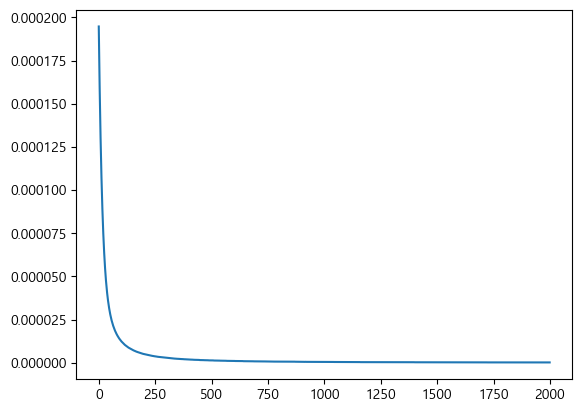

In [30]:
plt.plot(hist)
plt.show()

In [32]:
model[0].weight

Parameter containing:
tensor([[-5.1366, -5.1701],
        [ 5.3677, -5.0837],
        [ 3.9366,  4.4978],
        [-4.8019, -5.1962],
        [ 5.6188, -5.3505],
        [ 4.8500,  5.4355],
        [-4.9596,  4.7241],
        [-5.1226, -5.1170],
        [-4.8517, -4.4802],
        [ 4.9846, -5.1129],
        [-4.5765, -5.1309],
        [ 5.1519, -4.8852],
        [-4.7115,  5.0640],
        [-4.9492,  5.0240],
        [-5.2949,  5.9409],
        [-5.3148,  4.9557],
        [-5.4391,  5.2533],
        [-4.7825,  5.2297],
        [ 5.4880, -4.8644],
        [ 5.6021, -5.8976]], requires_grad=True)

In [33]:
model[2].weight

Parameter containing:
tensor([[-4.1173,  4.1723, -3.5346,  3.6863,  4.5529, -3.3488,  3.9321, -4.3070,
         -4.2062, -3.9432,  3.6313,  4.2251,  4.2053,  3.8398,  4.2727, -4.1003,
         -4.3495,  3.9457,  4.3692, -3.6407]], requires_grad=True)

In [34]:
# matmul(x,w1) + b1 => Sigmoid() => matmul(hx1,w2) +b2 => Sigmoid()
# 4x2 2x20 -> 4x20 -> Sig => 4x20 20x1 -> 4x1 -> Sig
(model.forward(x)  > 0.5 ) + 0

tensor([[0],
        [1],
        [1],
        [0]])